In [90]:
import warnings
import itertools
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [37]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')

nifty_data = pd.read_csv('./ml-timeseries-project/ml-project-data/NIFTY-50/2014.csv', header=0, 
                                                              parse_dates=[0], index_col=0, squeeze=True, 
                                                              date_parser=parser)

nifty_data['Average'] = nifty_data.loc[: , "High":"Low"].mean(axis=1)

In [38]:
y = nifty_data['Average']

In [39]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')

nifty_data_test = pd.read_csv('./ml-timeseries-project/ml-project-data/NIFTY-50/2015.csv', header=0, 
                                                              parse_dates=[0], index_col=0, squeeze=True, 
                                                              date_parser=parser)

nifty_data_test['Average'] = nifty_data_test.loc[: , "High":"Low"].mean(axis=1)

In [66]:
act = nifty_data_test['Average']

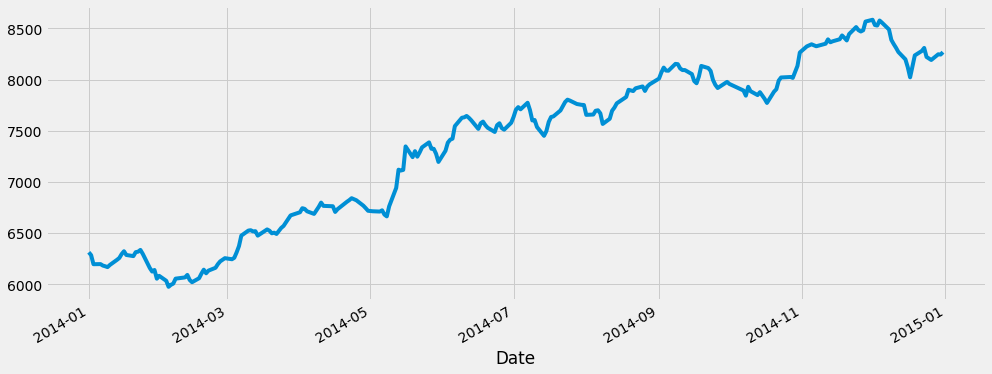

In [41]:
y.plot(figsize=(15, 6))
plt.show()

In [42]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], len(y)) for x in list(itertools.product(p, d, q))]

In [83]:
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            trend='n',
                                            order=param,
                                            seasonal_order=param_seasonal)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 244) - AIC:5042.195871437405
ARIMA(0, 0, 0)x(0, 1, 0, 244) - AIC:2.0
ARIMA(0, 0, 0)x(0, 2, 0, 244) - AIC:2.0
ARIMA(0, 1, 0)x(0, 0, 0, 244) - AIC:2629.1196650476977
ARIMA(0, 1, 0)x(0, 1, 0, 244) - AIC:2.0
ARIMA(0, 1, 0)x(0, 2, 0, 244) - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 244) - AIC:2613.407235449514
ARIMA(0, 1, 2)x(0, 0, 0, 244) - AIC:2615.3971044097916
ARIMA(0, 2, 0)x(0, 0, 0, 244) - AIC:2714.632734843864
ARIMA(0, 2, 0)x(0, 1, 0, 244) - AIC:2.0
ARIMA(0, 2, 0)x(0, 2, 0, 244) - AIC:2.0
ARIMA(0, 2, 1)x(0, 0, 0, 244) - AIC:2621.008189410133
ARIMA(0, 2, 2)x(0, 0, 0, 244) - AIC:2606.6683369287352
ARIMA(1, 1, 0)x(0, 0, 0, 244) - AIC:2614.5571325438696
ARIMA(1, 1, 1)x(0, 0, 0, 244) - AIC:2615.394568838653
ARIMA(1, 2, 0)x(0, 0, 0, 244) - AIC:2687.577777081423
ARIMA(1, 2, 1)x(0, 0, 0, 244) - AIC:2608.10290563217
ARIMA(1, 2, 2)x(0, 0, 0, 244) - AIC:2608.5808247560453
ARIMA(2, 1, 0)x(0, 0, 0, 244) - AIC:2615.773518507202
ARIMA(2, 1, 1)x(0, 0, 0, 244) - AIC:2617.178446996176


In [94]:
mod = sm.tsa.statespace.SARIMAX(y,
                                trend='n',
                                order=(1, 2, 2),
                                seasonal_order=(0, 0, 0, len(y)))

results = mod.fit()

print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                Average   No. Observations:                  244
Model:               SARIMAX(1, 2, 2)   Log Likelihood               -1300.290
Date:                Wed, 28 Nov 2018   AIC                           2608.581
Time:                        01:11:10   BIC                           2622.537
Sample:                             0   HQIC                          2614.203
                                - 244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0770      0.204     -0.378      0.706      -0.476       0.322
ma.L1         -0.6592      2.250     -0.293      0.770      -5.069       3.751
ma.L2         -0.3407      0.752     -0.453      0.6

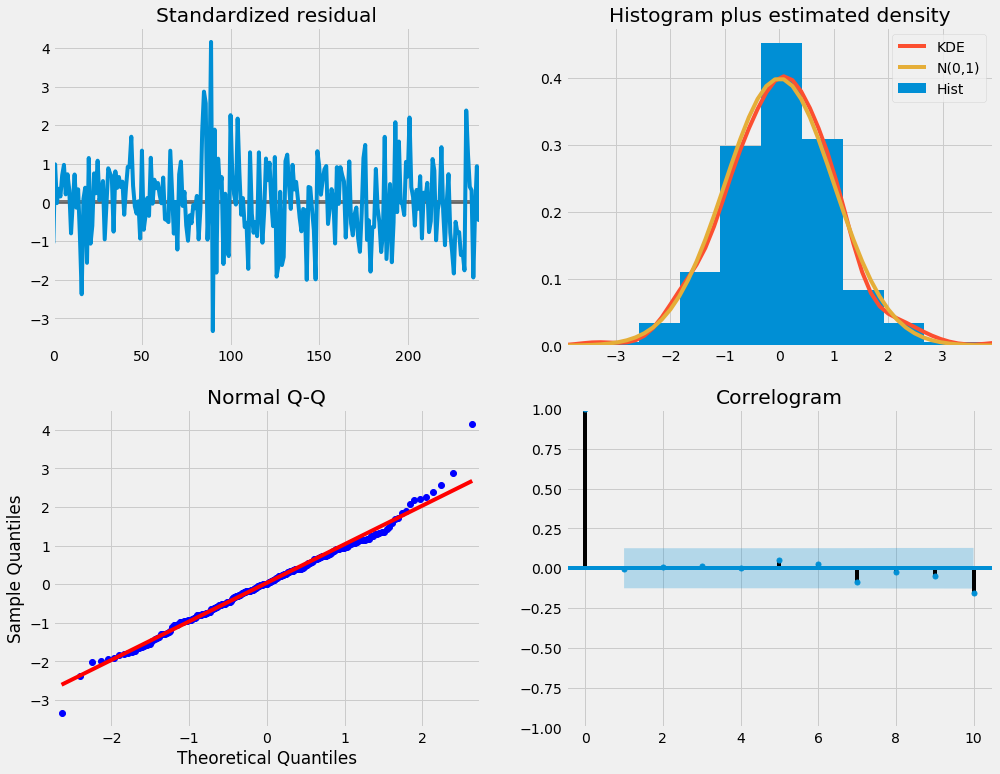

In [95]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [96]:
# Get forecast 500 steps ahead in future
pred = results.forecast(len(act))

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
np.array(pred)

array([ 8281.88309571,  8289.54384183,  8297.73191055,  8305.87936952,
        8314.02995591,  8322.18030144,  8330.33066552,  8338.48102818,
        8346.63139094,  8354.7817537 ,  8362.93211646,  8371.08247921,
        8379.23284197,  8387.38320473,  8395.53356749,  8403.68393024,
        8411.834293  ,  8419.98465576,  8428.13501851,  8436.28538127,
        8444.43574403,  8452.58610678,  8460.73646954,  8468.8868323 ,
        8477.03719506,  8485.18755781,  8493.33792057,  8501.48828333,
        8509.63864608,  8517.78900884,  8525.9393716 ,  8534.08973435,
        8542.24009711,  8550.39045987,  8558.54082263,  8566.69118538,
        8574.84154814,  8582.9919109 ,  8591.14227365,  8599.29263641,
        8607.44299917,  8615.59336192,  8623.74372468,  8631.89408744,
        8640.0444502 ,  8648.19481295,  8656.34517571,  8664.49553847,
        8672.64590122,  8680.79626398,  8688.94662674,  8697.09698949,
        8705.24735225,  8713.39771501,  8721.54807777,  8729.69844052,
      

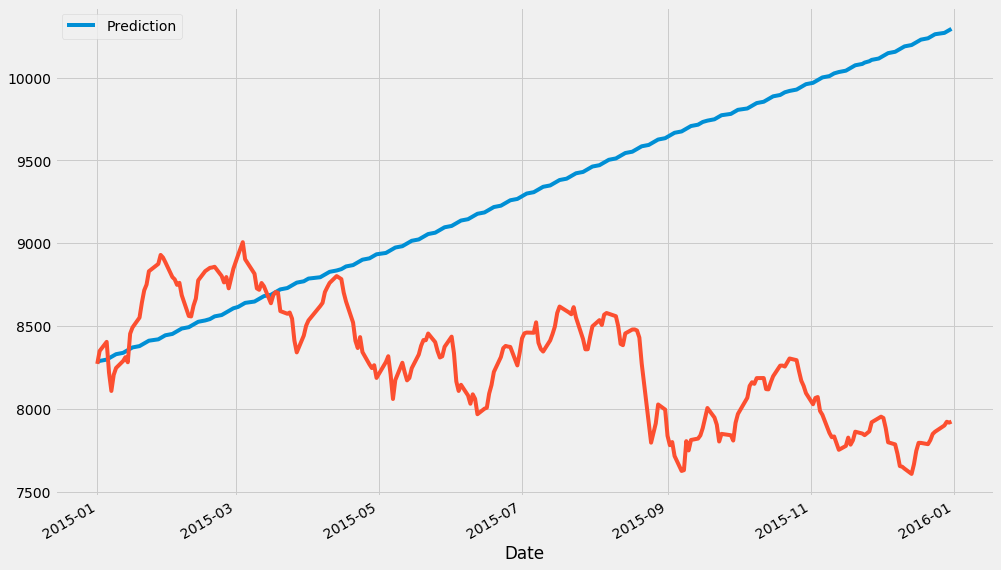

In [97]:
pred = pd.DataFrame(np.array(pred),index = act.index,columns=['Prediction'])
pred.plot(figsize=(15,10), label="Prediction")
act.plot(label="Actual")
plt.show()

In [104]:
model = ARIMA(y, order=(2, 0, 2))  
results_ARIMA = model.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                Average   No. Observations:                  244
Model:               SARIMAX(1, 2, 2)   Log Likelihood               -1300.290
Date:                Wed, 28 Nov 2018   AIC                           2608.581
Time:                        01:14:39   BIC                           2622.537
Sample:                             0   HQIC                          2614.203
                                - 244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0770      0.204     -0.378      0.706      -0.476       0.322
ma.L1         -0.6592      2.250     -0.293      0.770      -5.069       3.751
ma.L2         -0.3407      0.752     -0.453      0.6